In [1]:
%matplotlib inline
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

<h1 align="center">Posisjonering med Python</h1>

<h2 align="center">Geir Arne Hjelle</h2>

<h3 align="center">Geodesi- og Hydrografidagene</h3>
<h3 align="center">25. november, 2020</h3>

**Python** er et populært programmeringsspråk, særlig innen **dataanalyse**

- basert på **pakker**, ofte utviklet av frivillige
- pakkene er tilgjengelige på [pypi.org](https://pypi.org/)
- mange pakker for **GIS og kartanvendelser**
- bygd på toppen av biblioteker som **GDAL**, **PROJ**, osv

Denne presentasjonen vil vise frem en del av mulighetene

# Folium

**Folium** er et overbygg over **LeafletJS** og gir tilgang til interaktive kart:

In [2]:
import folium

kart = folium.Map((60, 10), zoom_start=10)
kart

## Folium

La oss definere noen punkter vi kan bruke i demonstrasjonen:

In [3]:
punkter = {
    "Andenes": (69.32, 16.12),
    "Hvervenmoen": (60.14, 10.25),
    "Oslo": (59.92, 10.75),
    "Stavanger": (58.97, 5.74),
}

## Folium

Du kan koble deg på forskjellige **WMTS-tjenester** - inkludert Kartverkets tjenester. Du kan også legge til **markører**, **polygoner** og annen informasjon:

In [4]:
kv_topo4 = "https://opencache.statkart.no/gatekeeper/gk/gk.open_gmaps?layers=topo4&zoom={z}&x={x}&y={y}"

kart = folium.Map((60, 10), zoom_start=6, tiles=kv_topo4, attr="Kartverket")
for navn, posisjon in punkter.items():
    folium.Marker(posisjon, popup=navn).add_to(kart)

kart

## Folium

**Folium** er spesielt nyttig for å **utforske** og **få oversikt** over dataene dine.

Pakken kan også fungere som en platform for å **visualisere** data for sluttbrukere.

Se [python-visualization.github.io/folium/](https://python-visualization.github.io/folium/) for mer informasjon.

# Geopandas

**Geopandas** er bygd på toppen av, og sammenstiller funksjonaliteten fra, mange forskjellige Pythonpakker:

- **pandas**: Dataanalyse
- **Shapely**: Beskrivelse av punkter, polygoner, osv
- **Fiona**: Lesing og skriving av geofilformater som Shape, GeoJSON, osv
- **PyProj**: Konvertering og transformasjon av koordinater, basert på **Proj**
- **Descartes**: Tegn punkter, polygoner osv i **Matplotlib**-figurer

## Geopandas

In [5]:
import geopandas as gpd
from shapely import geometry


data = gpd.GeoDataFrame(
    {
        "navn": [navn for navn in punkter.keys()],
        "lengde": [len(navn) for navn in punkter.keys()],
    },
    geometry=[geometry.Point(posisjon[::-1]) for posisjon in punkter.values()],
    crs="epsg:4326",
)
data

,navn,lengde,geometry
0,Andenes,7,POINT (16.12000 69.32000)
1,Hvervenmoen,11,POINT (10.25000 60.14000)
2,Oslo,4,POINT (10.75000 59.92000)
3,Stavanger,9,POINT (5.74000 58.97000)


In [6]:
data.query("lengde <= 8")

,navn,lengde,geometry
0,Andenes,7,POINT (16.12000 69.32000)
2,Oslo,4,POINT (10.75000 59.92000)


## Geopandas

Geopandas (egentlig **Fiona**) støtter ikke SOSI-filer, men programmet [Sosicon](https://sosicon.espenandersen.no/) kan brukes for å konvertere SOSI til Shape eller andre støttede formater.

Her er et eksempel hvor vi bruker fylkespolygoner lastet ned fra [GeoNorge](https://www.geonorge.no/).

In [7]:
fylker = gpd.read_file("Basisdata_0000_Norge_25833_Fylker_SOSI_Fylke_FLATE.shp")
fylker

,DATAUTTAKS,FYLKESNUMM,LOKALID,NAVN,NAVNEROM,OBJTYPE,OPPDATERIN,REKKEFOLGE,SAMISKFORV,SOSI_ID,SPRAK,TYPE,VERSJONID,geometry
0,20200928160331,38,173158173162,"""Vestfold og Telemark""","""https://data.geonorge.no/sosi/administrativee...",Fylke,20190913,None,NEI,19390,nor,FLATE,"""4.1""","POLYGON ((78548.430 6606728.760, 78462.900 660..."
1,20200928160331,42,173153173160,Agder,"""https://data.geonorge.no/sosi/administrativee...",Fylke,20190301,None,NEI,19391,nor,FLATE,"""4.1""","POLYGON ((12650.920 6523939.770, 12627.790 652..."
2,20200928160332,30,173157173156173161,Viken,"""https://data.geonorge.no/sosi/administrativee...",Fylke,20190225,None,NEI,19392,nor,FLATE,"""4.1""","POLYGON ((162857.290 6678845.090, 162754.160 6..."
3,20200928160332,11,173152,Rogaland,"""https://data.geonorge.no/sosi/administrativee...",Fylke,20200207,None,NEI,19393,nor,FLATE,"""4.1""","POLYGON ((-92079.540 6636303.790, -88921.170 6..."
4,20200928160332,18,173144,Nordland,"""https://data.geonorge.no/sosi/administrativee...",Fylke,20200207,None,JA,19394,nor,FLATE,"""4.1""","POLYGON ((372929.380 7521632.830, 379075.160 7..."
5,20200928160332,15,173147,"""MÃ¸re og Romsdal""","""https://data.geonorge.no/sosi/administrativee...",Fylke,20200207,None,NEI,19395,nor,FLATE,"""4.1""","POLYGON ((-20575.890 6963321.310, -19545.180 6..."
6,20200928160332,46,173150173151,Vestland,"""https://data.geonorge.no/sosi/administrativee...",Fylke,20200207,None,NEI,19396,nor,FLATE,"""4.1""","POLYGON ((-86165.900 6792746.680, -87860.580 6..."
7,20200928160332,03,173159,Oslo,"""https://data.geonorge.no/sosi/administrativee...",Fylke,20200207,None,NEI,19397,nor,FLATE,"""4.1""","POLYGON ((255493.650 6656227.710, 255286.540 6..."
8,20200928160332,50,173146173145,TrÃ¶Ã¶ndelage,"""https://data.geonorge.no/sosi/administrativee...",Fylke,20200207,2,JA,19398,sma,FLATE,"""4.1""","POLYGON ((228157.810 7170172.040, 247755.450 7..."
9,20200928160333,54,173143173142,"""Tromssa ja Finmarkku""","""https://data.geonorge.no/sosi/administrativee...",Fylke,20200207,3,JA,19399,fkv,FLATE,"""4.1""","POLYGON ((701859.740 7853460.760, 726452.490 7..."


Legg merke til at hver geometri (hvert fylkespolygon) har en del tilhørende informasjon.

## Geopandas

Geopandas støtter enkel opptegning av de geografiske dataene.

<AxesSubplot:>

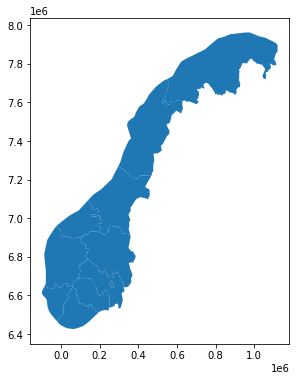

In [8]:
fylker.plot(figsize=(6, 6))

## Geopandas

Dette kan kombineres med spørringer og annen pandas-funksjonalitet.

<AxesSubplot:>

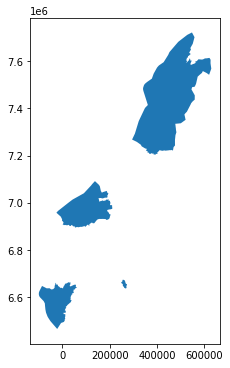

In [9]:
fylker.astype({"FYLKESNUMM": int}).query("FYLKESNUMM <= 20").plot(figsize=(6, 6))

## Geopandas

Du kan også fargelegge kartet basert på tilhørende data.

<AxesSubplot:>

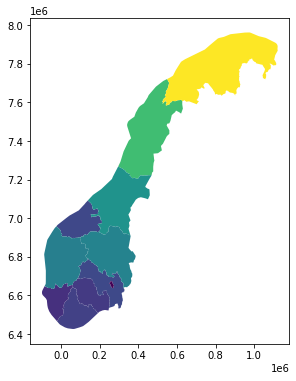

In [10]:
fylker.assign(areal=lambda df: df.area / 1_000_000).plot(column="areal", figsize=(6, 6))

## Geopandas

Gjennom **PyProj** støtter Geopandas koordinattransformasjoner.

Referansesystemet for fylkesdatasettet er UTM33:

In [11]:
fylker.crs

<Projected CRS: EPSG:25833>
Name: ETRS89 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°E and 18°E: Austria; Denmark - offshore and offshore; Germany - onshore and offshore; Norway including Svalbard - onshore and offshore.
- bounds: (12.0, 46.4, 18.01, 84.01)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Vi kan transformere til lengde-bredde:

<AxesSubplot:>

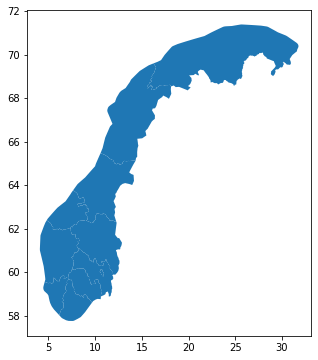

In [12]:
fylker.to_crs(epsg=4326).plot(figsize=(6, 6))

Etterhvert som Kartverkets transformasjoner blir tilgjengelige gjennom **Proj** vil de også bli tilgjengelige i **Geopandas**.

## Geopandas

**Geopandas** er en **arbeidshest** for all analyse av geografiske data.

Pakken gir tilgang til mye nyttig funksjonalitet i en pakke, og kan brukes til **dataanalyse**, **konvertering** mellom filformater, **transformasjoner** av koordinater, og statiske **visualiseringer**.

Se [geopandas.org](https://geopandas.org/) for mer informasjon.

## Contextily

**Contextily** kan brukes for lage statiske visualiseringer basert på WMTS-tjenester.

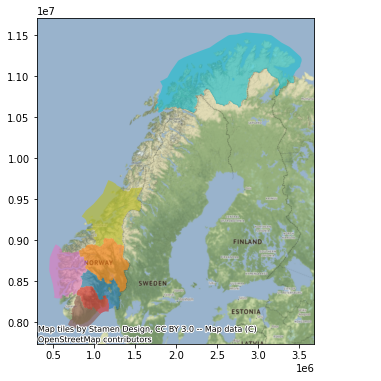

In [13]:
import contextily as ctx

ax = (
    fylker.query("FYLKESNUMM > '20'")
    .to_crs(epsg=3857)
    .plot(column="FYLKESNUMM", alpha=0.6, figsize=(6, 6))
)
ctx.add_basemap(ax)

## Contextily

På samme måte som for **Folium** støtter Contextily forskjellige WMTS-tjenester, inkludert Kartverkets:

In [14]:
holmenkollen = gpd.read_file("holmenkollen.json")
holmenkollen

,name,geometry
0,Holmenkollen,"POLYGON ((10.66411 59.96542, 10.66472 59.96359..."


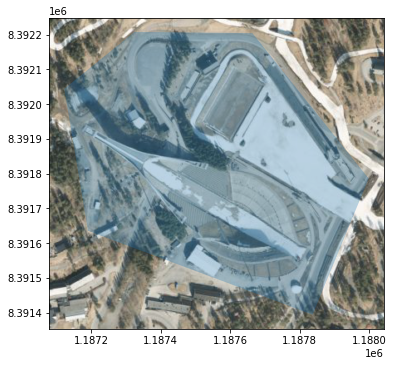

In [15]:
kv_norgeibilder = "http://opencache.statkart.no/gatekeeper/gk/gk.open_nib_web_mercator_wmts_v2?SERVICE=WMTS&REQUEST=GetTile&VERSION=1.0.0&LAYER=Nibcache_web_mercator_EUREF89_v2&STYLE=default&FORMAT=image/jpgpng&TILEMATRIXSET=default028mm&TILEMATRIX={z}&TILEROW={y}&TILECOL={x}"

ax = holmenkollen.to_crs(epsg=3857).plot(alpha=0.3, figsize=(6, 6))
ctx.add_basemap(ax, source=kv_norgeibilder, zoom=16)

## Contextily

**Contextily** utvider bruksområdene til WMTS-tjenester, og støtter også transformering av kartfliser.

Pakken er spesielt nyttig for fleksible, statiske **visualiseringer**.

Se [contextily.readthedocs.io](https://contextily.readthedocs.io/) for mer info.

# RasterIO

**RasterIO** er en pakke for å lese og jobbe med raster-data, slik som for eksempel **høydemodeller**. Her bruker vi en Digital OverflateModell fra [hoydedata.no](https://hoydedata.no/):

In [16]:
import rasterio
from rasterio import plot

dom = rasterio.open("DOM_32-1-514-135-40.tif")
dom.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 810,
 'height': 610,
 'count': 1,
 'crs': CRS.from_epsg(25832),
 'transform': Affine(1.0, 0.0, 592795.0,
        0.0, -1.0, 6648605.0)}

## RasterIO

RasterIO jobber sammen med **Matplotlib** for enkle visualiseringer av rasterdataene:

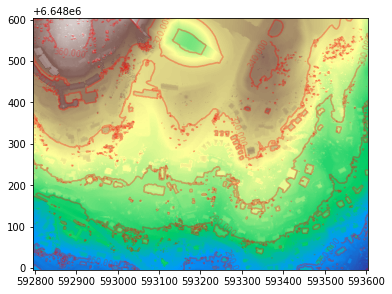

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot.show(dom, ax=ax, cmap="terrain", aspect="equal")
plot.show(dom, ax=ax, contour=True, levels=range(200, 400, 20), alpha=0.3)
plt.show()


## RasterIO

RasterIO kan kombineres med polygoner og andre geometrier for å **maskere** dataene.

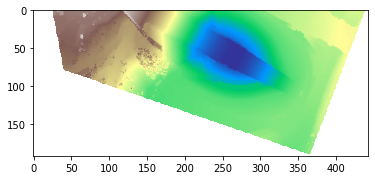

In [18]:
import numpy as np
from rasterio import mask

stadion, transform = mask.mask(dom, holmenkollen.to_crs("epsg:25832").geometry, crop=True)
stadion[stadion < 0] = np.nan
plt.imshow(stadion[0], cmap="terrain", aspect="equal")

## RasterIO

**RasterIO** gir effektiv tilgang til raster-data.

Pakken støtter mange operasjoner inkludert **transformasjoner**, **kombinasjon** av data, **maskeringer** osv.

Se [rasterio.readthedocs.io](https://rasterio.readthedocs.io/) for mer informasjon.

# Midgard

**Midgard** er en pakke utviklet av **Kartverket**. Midgard startet som et støttebibliotek til **Where**, Kartverkets programvare for å beregne referanserammer basert på VLBI, SLR, og GNSS.

Midgard gir tilgang til en datastruktur for sammenstilling av **posisjon**, **hastighet** og **tid** med geodetisk nøyaktighet.

In [19]:
from midgard.data import dataset

dset = dataset.Dataset(num_obs=4)
dset.add_text("navn", val=list(punkter.keys()))
dset.add_time("tidspunkt", val=["2020-11-25T11:30:00"] * 4, scale="utc", fmt="isot")
dset.add_position("posisjon", val=np.array([[pkt[0] for pkt in punkter.values()], [pkt[1] for pkt in punkter.values()], [10, 20, 40, 25]]).T, system="llh", time="tidspunkt")
print(dset)

Dataset(num_obs=4, num_fields=3)
Fields: navn, posisjon, tidspunkt


## Midgard

Posisjoner og hastigheter støtter forskjellige koordinatsystemer:

- **llh**: Breddegrad, Lengdegrad, Høyde
- **trs**: XYZ
- **enu**: Lokalt Øst, Nord, Opp

In [20]:
dset.posisjon.to_system("trs")

TrsPosition([[-5722805.58629299, -2501179.8390875 ,  1289630.19427115],
             [ 3899104.09798618,  4222717.61274728, -2755964.67613069],
             [ 1510141.17264271,  6025309.92444459, -1442990.90485039],
             [-4110009.89648056,  2481491.46688885,  4184846.62834848]])

## Midgard

Tid kan konverteres mellom forskjellige **tidsskalaer** (UTC, TAI, GPS, osv) og **tidsformater** (tekst, Julian Day, Python `datetime`, osv)

In [21]:
print(dset.tidspunkt.tai)
print(dset.tidspunkt.gps.jd)

['2020-11-25T11:30:37.000000' '2020-11-25T11:30:37.000000'
 '2020-11-25T11:30:37.000000' '2020-11-25T11:30:37.000000']
[2459178.979375 2459178.979375 2459178.979375 2459178.979375]


## Midgard

**Midgard** kan brukes til å gjøre effektive beregninger på geodetiske punkter.

Pakken er nyttig for å behandle tidsserier med høyest mulig nøyaktighet.

Se [kartverket.github.io/midgard](https://kartverket.github.io/midgard/) for mer informasjon.

**Where** ([kartverket.github.io/where](https://kartverket.github.io/where/)) er programvare som bruker Midgard til databehandlingen.

<h1 align="center">Takk for meg!</h1>

<h2 align="center">geirarne@gmail.com</h2>